In [258]:
# packages for data Exploration
import torch
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, WordPunctTokenizer, TreebankWordTokenizer, RegexpTokenizer, sent_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import re

In [259]:
# connect to GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [260]:
# open german txt file
with open ("/home/chanhwi/workspace/Transformer_Reimplementation/dataset/train.de", "r") as f:
    txt_de = f.read()
    

# open english txt file
with open ("/home/chanhwi/workspace/Transformer_Reimplementation/dataset/train.en", "r") as f:
    txt_en = f.read()
    

In [261]:
# make token library using TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

tokenized_de = tokenizer.tokenize(txt_de)
tokenized_en = tokenizer.tokenize(txt_en)

# make token library using word_tokenize

t2w_tokenized_de = text_to_word_sequence(txt_de)
t2w_tokenized_en = text_to_word_sequence(txt_en)

In [263]:
# remove stopwords
stop_words = set(stopwords.words('english') + [',', '.', ':', ';', '–', '--']) 

clean_words_de = [] 
for word in tokenized_de: 
    if word not in stop_words: #불용어 제거
        clean_words_de.append(word)


clean_words_en = [] 
for word in tokenized_en: 
    if word not in stop_words: #불용어 제거
        clean_words_en.append(word)
        
        
clean_words_de_2 = [] 
for word in t2w_tokenized_de: 
    if word not in stop_words: #불용어 제거
        clean_words_de_2.append(word)
        

clean_words_en_2 = [] 
for word in t2w_tokenized_en:
    if word not in stop_words: #불용어 제거
        clean_words_en_2.append(word)

In [264]:
# number of tokens in each corpus

print('# of tokens in german txt :', len(clean_words_de))
print('# of tokens in english txt :', len(clean_words_en))

# of tokens in german txt : 3077933
# of tokens in english txt : 1971518


In [265]:
# token counter function

from collections import Counter

def count_elements(list_of_words):
    return dict(Counter(list_of_words))

In [266]:
# dataframe of german top-10 word frequency by TreebankWordTokenizer

df_clean_words_de = pd.DataFrame(list(count_elements(clean_words_de).items()),
                                      columns=['word','# of word'])

df_clean_words_de.sort_values(by=['# of word'], ascending=False).head(10)

,word,# of word
27,die,82841
32,und,74447
23,der,54388
3,ist,46910
16,das,44620
54,zu,42902
147,ich,38659
33,wir,37369
95,es,35002
145,Sie,31047


In [267]:
# dataframe of german top-10 word frequency by t2w

df_t2w_tokenized_de = pd.DataFrame(list(count_elements(clean_words_de_2).items()),
                                      columns=['word','# of word'])

df_t2w_tokenized_de.sort_values(by=['# of word'], ascending=False).head(10)

,word,# of word
30,und,99791
25,die,91239
37,sie,61020
2,das,58921
6,ich,58315
21,der,57409
3,ist,51452
9,wir,49270
87,es,48474
49,zu,43506


In [268]:
# dataframe of german bottom-10 word frequency by TreebankWordTokenizer
df_clean_words_de.sort_values(by=['# of word']).head(10)

,word,# of word
79970,Einklang.,1
103917,Biryani,1
103911,homosexuelles,1
103909,Kinderbüchern,1
103907,spassigen,1
103906,pupsen,1
103905,Töpfchen,1
103904,Pop-it,1
103903,Kultursymbole,1
103902,harmlosesten,1


In [269]:
# dataframe of german bottom-10 word frequency by t2w
df_t2w_tokenized_de.sort_values(by=['# of word']).head(10)

,word,# of word
58776,pionierhaften,1
76059,brodsky,1
76058,sträuben,1
76056,erzählenden,1
76055,funktionsfähigste,1
76054,didion,1
76053,gegenteilig,1
76051,entsprechungen,1
76049,durchlitten,1
76048,orfalli,1


In [270]:
# dataframe of english top-10 word frequency by TreebankWordTokenizer
df_clean_words_en = pd.DataFrame(list(count_elements(clean_words_en).items()),
                                      columns=['word','# of word'])

df_clean_words_en.sort_values(by=['# of word'], ascending=False).head(10)

,word,# of word
5,I,63584
22,'s,43980
9,And,34958
153,?,17395
383,So,17269
204,n't,16775
130,'',14448
10,'re,13206
89,It,12519
121,``,12231


In [275]:
# dataframe of english top-10 word frequency by t2w
df_t2w_tokenized_en = pd.DataFrame(list(count_elements(clean_words_en_2).items()),
                                      columns=['word','# of word'])

df_t2w_tokenized_en.sort_values(by=['# of word'], ascending=False).head(10)

,word,# of word
121,one,13637
50,like,12544
113,people,12381
668,know,9095
7,going,9027
16,that's,8256
32,think,8167
48,see,8053
199,really,7649
350,would,7453


In [276]:
# dataframe of english bottom-10 word frequency 
df_clean_words_en.sort_values(by=['# of word']).head(10)

,word,# of word
84261,lakebed,1
30865,RUS,1
60462,satchels,1
60461,Taliban-like,1
60460,Peshawar.,1
30870,S600,1
30871,V12,1
30872,six-liter,1
30863,unionseek.com/d/ioo.exe,1
60459,turmoil.,1


In [277]:
# dataframe of german bottom-10 word frequency by t2w
df_t2w_tokenized_en.sort_values(by=['# of word']).head(10)

,word,# of word
51558,lakebed's,1
13471,diddy,1
13470,frivolously,1
25347,multiplies,1
39972,princesses,1
25350,pare,1
39973,agamemnon,1
39971,montel,1
39974,bootblack,1
13463,vml,1


In [278]:
# histogram of german word frequency 
plt.style.use('ggplot')
plt.title('tokens in german')
plt.xlabel('tokens')
plt.ylabel('# of tokens')
plt.hist(clean_words_de, bins=100, color='blue')
plt.show()

/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36865 (\N{CJK UNIFIED IDEOGRAPH-9001}) missing from current font.
  

KeyboardInterrupt: 

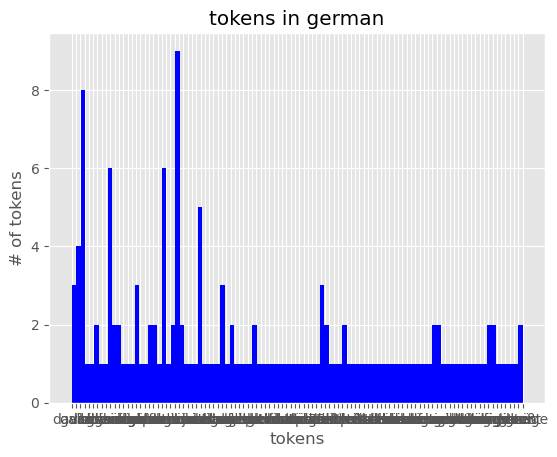

In [ ]:
# histogram of german word frequency 
plt.style.use('ggplot')
plt.title('tokens in german')
plt.xlabel('tokens')
plt.ylabel('# of tokens')
plt.hist(clean_words_de_2, bins=100, color='blue')
plt.show()

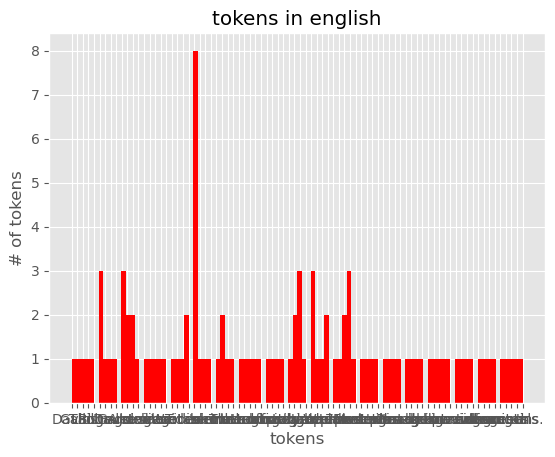

In [ ]:
# histogram of english word frequency 
plt.style.use('ggplot')
plt.title('tokens in english')
plt.xlabel('tokens')
plt.ylabel('# of tokens')
plt.hist(clean_words_en, bins=100, color='red')
plt.show()

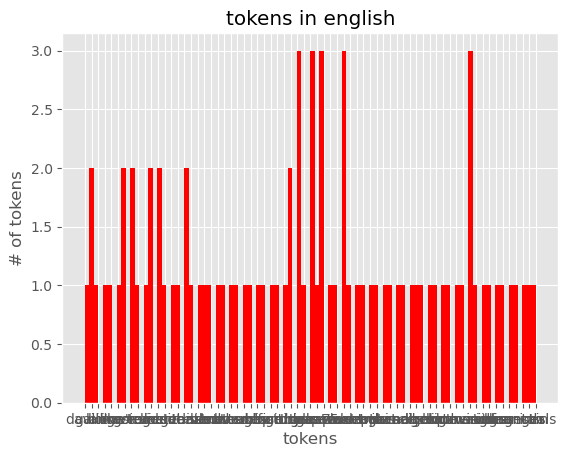

In [ ]:
# histogram of english word frequency 
plt.style.use('ggplot')
plt.title('tokens in english')
plt.xlabel('tokens')
plt.ylabel('# of tokens')
plt.hist(clean_words_en_2, bins=100, color='red')
plt.show()